In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern


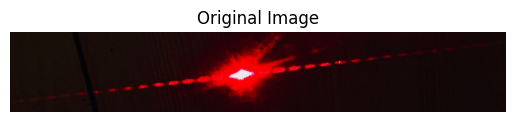

In [ ]:
img = cv2.imread('/content/Pattern.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()


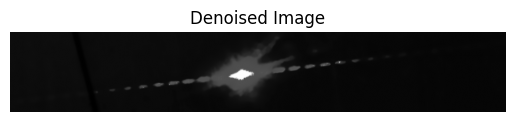

In [ ]:
denoised = cv2.fastNlMeansDenoising(img_gray, None, h=10, templateWindowSize=7, searchWindowSize=21)
plt.imshow(denoised, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')
plt.show()


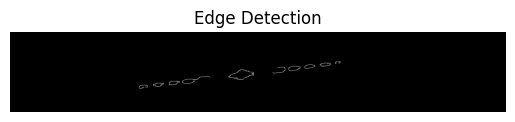

In [ ]:
edges = cv2.Canny(denoised, 50, 150)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.show()


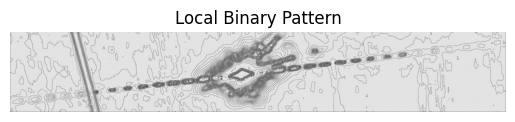

In [ ]:
lbp = local_binary_pattern(denoised, P=8, R=1, method='uniform')
plt.imshow(lbp, cmap='gray')
plt.title('Local Binary Pattern')
plt.axis('off')
plt.show()


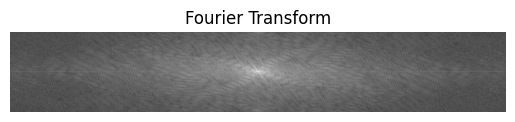

In [ ]:
f = np.fft.fft2(denoised)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Transform')
plt.axis('off')
plt.show()


In [ ]:
f = np.fft.fft2(denoised)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.abs(fshift)
log_spectrum = 20 * np.log(magnitude_spectrum + 1)  # Avoid log(0)


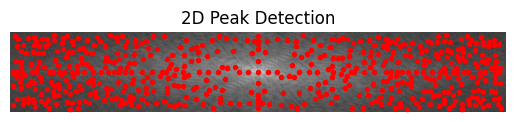

In [ ]:
from skimage.feature import peak_local_max

coordinates = peak_local_max(log_spectrum, min_distance=10, threshold_abs=30)
plt.imshow(log_spectrum, cmap='gray')
plt.plot(coordinates[:, 1], coordinates[:, 0], 'r.')
plt.title("2D Peak Detection")
plt.axis('off')
plt.show()


In [ ]:
pixel_distance = np.abs(peaks - center_line.size // 2)
pixel_scale = 1e-6  # meters per pixel (adjust based on your setup)
screen_distance = 1.0  # meters

theta = np.arctan(pixel_distance * pixel_scale / screen_distance)


In [ ]:
wavelength = 660e-9  # meters
order = 1  # first-order peak

d = wavelength / np.abs(np.sin(theta[0]))  # for first peak
print(f"Estimated slit spacing: {d:.2e} meters")


Estimated slit spacing: 6.60e-05 meters


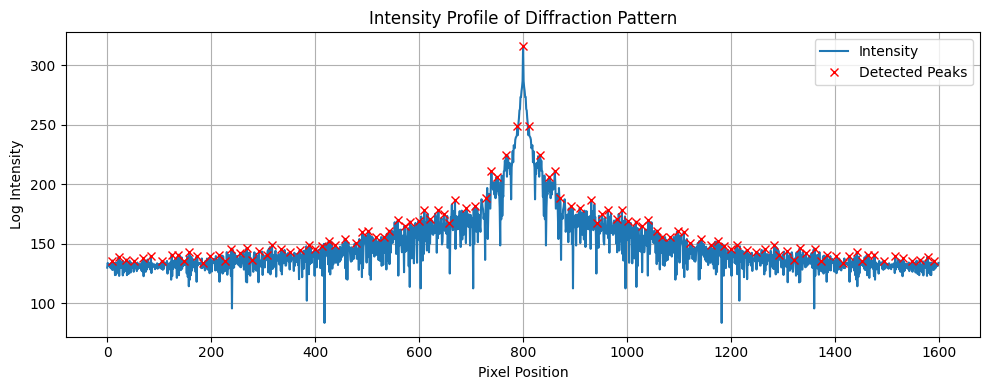

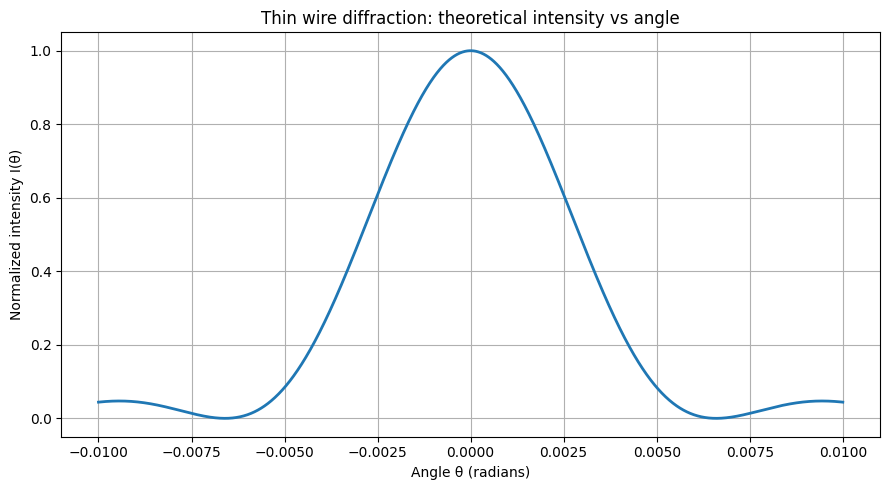

In [ ]:
from scipy.signal import find_peaks

# Central horizontal slice
center_line = log_spectrum[log_spectrum.shape[0] // 2, :]
peaks, _ = find_peaks(center_line, height=30, distance=10)

plt.figure(figsize=(10, 4))
plt.plot(center_line, label='Intensity')
plt.plot(peaks, center_line[peaks], "rx", label='Detected Peaks')
plt.title("Intensity Profile of Diffraction Pattern")
plt.xlabel("Pixel Position")
plt.ylabel("Log Intensity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#theoretical Graph
d = 0.10e-3      # wire diameter
lam = 660e-9     # wavelength in meters
I0 = 1.0         # arbitrary normalization
theta = np.linspace(-0.01, 0.01, 2000)  # radians

alpha = (np.pi * d * np.sin(theta)) / lam
I = I0 * (np.sin(alpha) / np.where(alpha==0, 1e-12, alpha))**2

plt.figure(figsize=(9, 5))
plt.plot(theta, I, lw=2)
plt.title('Thin wire diffraction: theoretical intensity vs angle')
plt.xlabel('Angle θ (radians)')
plt.ylabel('Normalized intensity I(θ)')
plt.grid(True)
plt.tight_layout()
plt.show()
